In [32]:
import networkx as nx
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#From there, you can create a graph by using the Graph method.

G = nx.Graph()

In [3]:
#Once the graph is created, you can add nodes and edges to the graph using the respective add_node and add_edge methods.

G.add_node(1)
G.add_nodes_from([2, 3])

G.add_edge(1, 2)
G.add_edges_from([(1, 2), (1, 3)])

Two of the basic things we would want to know about a graph is its order (number of nodes) and size (number of edges). We can calculate those with Networkx using the order or number_of_nodes methods to get the total nodes and the size or number_of_edges methods to get the total edges.

In [4]:
G.order()
G.number_of_nodes()

G.size()
G.number_of_edges()

2

There are a few other important statistics that we would want to know about a graph that Networkx can compute for us. For example, each node in a graph has a degree, or the number of nodes you can reach from that node by traversing along the edges of the graph (jumping from one node to other connected nodes). The average degree of the graph tells you the average number of nodes that can be reached from a node in the graph and is a measure of how connected your graph is. We can retrieve the degree for each node in a graph by calling the degree method, so obtaining the average degree is just a matter of summing up all the degree values and then dividing by the number of nodes in the graph.

In [5]:
sum(dict(G.degree()).values())/G.order()

1.3333333333333333

There are a couple other graph statistics you should know about: diameter and average distance. However, these statistics are only applicable when you have a completely connected graph or one where all nodes can reach all other nodes. When this is the case, the diameter of the graph tells you the what the longest path in the network is, or the maximum number of nodes you'll encounter getting between two nodes. Average distance is simply the average number of nodes you'll encounter getting between two nodes. Both can be computed as follows.

In [6]:
nx.diameter(G)

nx.average_shortest_path_length(G)

1.3333333333333333

In addition to calculating statistics that inform us about the properties of the graph as a whole, we can compute centrality metrics that tell us which nodes are most important and influential. Networkx comes with a variety of centrality metrics such as betweenness, closeness, eigenvector, degree, and pagerank. Each of these metrics calculate node importance slightly differently.

Betweenness centrality tells us which nodes in our network are likely pathways for information. Closeness centrality measures node reach or how fast information would spread from that node to other nodes. Degree centrality is a measure of popularity based on a node's degree. Eigenvector centrality measures related influence or who is closest to the most important nodes in the network. PageRank centrality is a variant of Eigenvector centrality that uses edges from other important nodes as a measure of a node's importance.

Each of these centrality measures can be obtained for each node in a graph as follows.

In [7]:
betweenness = nx.betweenness_centrality(G, weight='edge')
closeness = nx.closeness_centrality(G, distance='edge')
eigenvector = nx.eigenvector_centrality_numpy(G)
degree = nx.degree_centrality(G)
pagerank = nx.pagerank(G)

# Rows Represent Transactions or Interactions

In [8]:
women = pd.read_csv('us_womens_gymnastics.csv')
display((women).head(5))
display(women.shape)
display(women.dtypes)
np.unique(women['Name_x'],return_counts=True)

,Name_x,Name_y,Games,Event
0,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Marian Emma Barone (Twining-),1948 Summer,Gymnastics Women's Team All-Around
1,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)","Consetta Anne ""Connie"" Caruccio-Lenz",1948 Summer,Gymnastics Women's Team All-Around
2,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Dorothy Katherine Dalton,1948 Summer,Gymnastics Women's Team All-Around
3,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Meta Elste (Neumann-),1948 Summer,Gymnastics Women's Team All-Around
4,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Helen Mary Schifano (-Sjursen),1948 Summer,Gymnastics Women's Team All-Around


(2866, 4)

Name_x    object
Name_y    object
Games     object
Event     object
dtype: object

(array(['Ada Lunardoni (-Cumiskey, -Hutcheon)', 'Adelaide Meyer',
        'Alexandra Rose "Aly" Raisman', 'Alicia Marie Sacramone (-Quinn)',
        'Amanda Kathleen Borden (-Cochran)', 'Amy Yuen-Yee Chow (-Ho)',
        'Anastasiya Valeryevna "Nastia" Liukin',
        'Anita Aline Simonis (-Zetts)', 'Annia Portuondo Hatch',
        'Brandy K. Johnson (-Scharpf)', 'Bridget Elizabeth Sloan',
        'Carly Rae Patterson (-Caldwell)',
        'Caroline Lynne "Carrie" Englert (-Zimmerman)',
        'Carrol Michelle "Chelle" Stack',
        'Cathleen Roxanne "Cathy" Rigby (-Mason, -McCoy)',
        'Chellsie Marie Memmel (-Maier)', 'Clara Marie Schroth-Lomady',
        'Colleen Mary Casey (-Shields)', 'Colleen Yvonne Mulvihill',
        'Consetta Anne "Connie" Caruccio-Lenz',
        'Courtney Anne Kupets (-Carter)', 'Courtney Lynn McCool',
        'Deborah Ann "Debra" Willcox',
        'Dominique Helena Moceanu (-Canales)',
        'Dominique Margaux Dawes (-Thompson)',
        'Doris Ann

The us_womens_gymnastics.csv data set is a good example of this type of data. The data set contains pairs of U.S. gymnasts that competed in the same Olympic games and events together. In other words, each row represents an interaction between the gymnasts. Use your Python skills, use Pandas to read and aggregate the data by the Name_x and Name_y fields and count the number of events in which they have an interaction. Once you have done this, sort descending by the number of pairwise interactions. Which pair of gymnasts have competed in the most events together?

In [9]:
#grouped=women.groupby(['Name_x','Name_y']).count()
#grouped
#women2=women.groupby([women['Pair'],women['Event']]).count()
#women2

In [123]:
#women['Pair']= women['Name_x']+' , '+women['Name_y']
#women2=women.groupby([women['Pair'],women['Event']]).count()
#women2

#women2=women.groupby(women['Pair']).agg({'Event':'count'})
#display(women2.head())
#women2.sort_values(by='Event',ascending=False)


Now that we have a data frame in this format, Networkx provides us with an easy way to turn it into a graph via the from_pandas_edgelist method.



In [126]:
#G = nx.from_pandas_edgelist(women,source='Pair', target='Event')
#nx.draw(G)



https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/
https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm

In [127]:
#G = nx.from_pandas_edgelist(women,source='Name_x', target='Event')
#nx.draw(G)

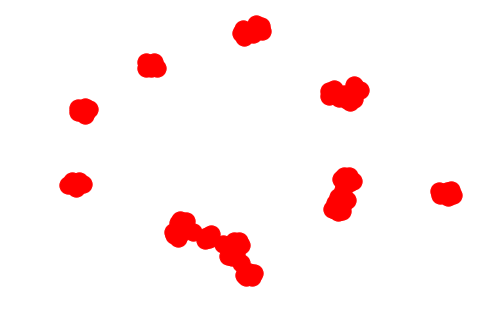

In [120]:
G = nx.from_pandas_edgelist(women,source='Name_x', target='Name_y')
nx.draw(G)

   1. How many gymnasts (nodes) are in the graph?

In [14]:
G.order()
n=G.number_of_nodes()
n

94

2. How many edges are in the graph?

In [15]:
G.size()
m=G.number_of_edges()
m

292

3.What is the average degree?

In [16]:
sum(dict(G.degree()).values())/G.order()

6.212765957446808

4.What is the density of the graph?

In [17]:
#d=m/float(n*(n-1))
#d
nx.density(G)

0.06680393502630977

5.Is this graph fully-connected? How do you know?
No, because the density would be equal to 1

6.What gymnast has the highest betweenness centrality?

In [18]:
betweenness = nx.betweenness_centrality(G, weight='edge')
max(betweenness.items(),key=lambda x: x[1])

('Linda Joan Metheny (-Mulvihill)', 0.05002337540906966)

7.What gymnast has the highest Eigenvector centrality?

In [19]:
eigenvector = nx.eigenvector_centrality_numpy(G)
max(eigenvector.items(),key=lambda x:x[1])
#cada vez que lo ejecutas da un resultado diferente

('Clara Marie Schroth-Lomady', 0.330625940301217)

8.What gymnast has the highest degree centrality?

In [20]:
degree = nx.degree_centrality(G)
max(degree.items(),key=lambda x: x[1])

('Consetta Anne "Connie" Caruccio-Lenz', 0.15053763440860216)

# Rows Represent Entities

In [21]:
men=pd.read_csv('us_mens_basketball.csv')
men.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [111]:
def df_to_graph(df, entity, edge):
    df2 = df.copy()
    graph_df = pd.merge(df, df2, how='inner', on=edge)
    graph_df = graph_df.groupby([entity + '_x', entity + '_y']).count().reset_index()
    graph_df = graph_df[graph_df[entity + '_x'] != graph_df[entity + '_y']]
    
    if type(edge) == list:
        graph_df = graph_df[[entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df[[entity + '_x', entity + '_y', edge]]
    
    return graph_df

In [112]:
men2=df_to_graph(men,'Name','Games')
men2.head()

,Name_x,Name_y,Games
1,Adrian Delano Dantley,"Ernest ""Ernie"" Grunfeld",1
2,Adrian Delano Dantley,"Kenneth Alan ""Kenny"" Carr",1
3,Adrian Delano Dantley,"Michel Taylor ""Tate"" Armstrong",1
4,Adrian Delano Dantley,"Mitchell William ""Mitch"" Kupchak",1
5,Adrian Delano Dantley,"Philip Jackson ""Phil"" Ford, Jr.",1


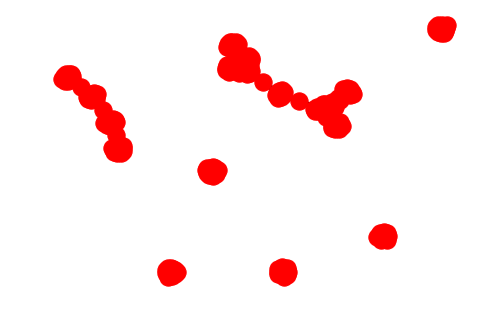

In [115]:
G2= nx.from_pandas_edgelist(men2,'Name_x','Name_y')
nx.draw(G2)


1. How many basketball players (nodes) are in the graph?

In [132]:
G2.order()
n=G2.number_of_nodes()
n

196

2. How many edges are in the graph?

In [133]:
G2.size()
m=G2.number_of_edges()
m

1232

3.What is the average degree?

In [138]:
sum(dict(G.degree()).values())/G.order()

9.584158415841584

4.  What is the density of the graph?

In [134]:
nx.density(G2)

0.06446886446886448

5. Is this graph fully-connected? How do you know

No, because is not equal to 1

6. What player has the highest betweenness centrality?

In [135]:
betweenness = nx.betweenness_centrality(G2, weight='edge')
max(betweenness.items(),key=lambda x: x[1])

('Gary Dwayne Payton', 0.09193761564895586)

7.  What player has the highest Eigenvector centrality?

In [136]:
eigenvector = nx.eigenvector_centrality_numpy(G2)
max(eigenvector.items(),key=lambda x:x[1])

('Carmelo Kyan Anthony', 0.34185005667190743)

8. What player has the highest degree centrality?

In [137]:
degree = nx.degree_centrality(G2)
max(degree.items(),key=lambda x: x[1])

('Carmelo Kyan Anthony', 0.18461538461538463)

9. What are some notable differences between this graph and the gymnastics graph you analyzed earlier?

This one has a higher average degree

# Visualization of Network Data

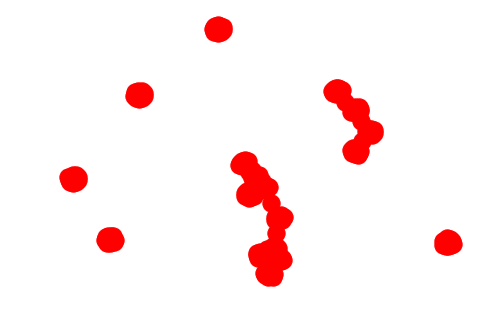

In [139]:
nx.draw(G2)

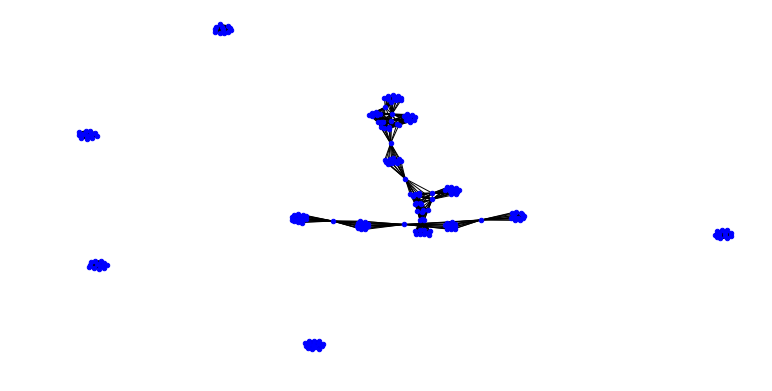

In [140]:
plt.figure(figsize=(10,5))
nx.draw(G2, node_size=20, node_color='blue')

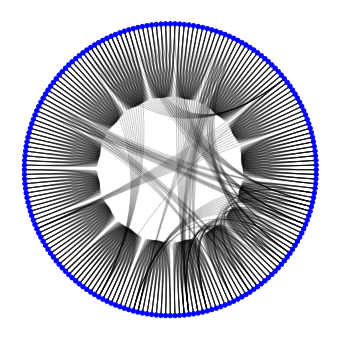

In [141]:
#Circos Plots
from nxviz import CircosPlot

c = CircosPlot(G2)
c.draw()

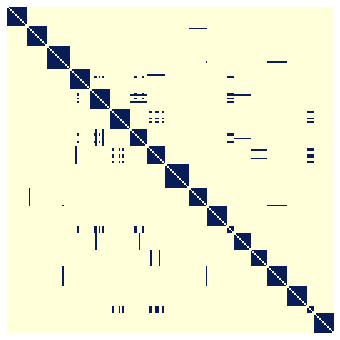

In [142]:
#Matrix Plots
from nxviz import MatrixPlot

m = MatrixPlot(G2)
m.draw()

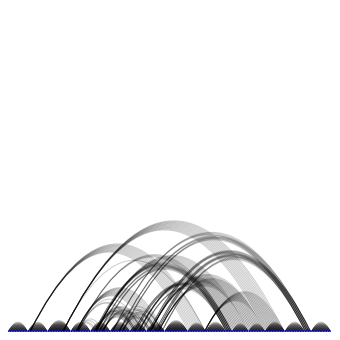

In [143]:
#Arc Plots
from nxviz import ArcPlot

a = ArcPlot(G2)
a.draw()

# Bar Charts

For example, you can aggregate your data by entity, count the number of connections or the total number of interactions, sort them, filter to get just the top 20, and visualize it as a horizontal bar chart. By this point in the program, you should have all the tools in your arsenal to be able to do this. Try it for the basketball data set and see who are the top 20 players in the network that have played alongside the most number of other players.

In [82]:
best = pd.crosstab(men['Name'],['Games']).sort_values(by='Games',ascending=False).head(20)
display(best)
display(best.columns)


#men.groupby('Name').agg({'Games': np.unique}).head(20)
#basket_group = men[['Name', 'Games']].groupby('Name').agg(np.size).sort_values(by='Games', ascending=False)

col_0,Games
Name,
Carmelo Kyan Anthony,4
David Maurice Robinson,3
LeBron Raymone James,3
Patrick Aloysius Ewing,2
John Houston Stockton,2
Michael Jeffrey Jordan,2
Charles Wade Barkley,2
"Christopher Emmanuel ""Chris"" Paul",2
"Mitchell James ""Mitch"" Richmond, III",2


Index(['Games'], dtype='object', name='col_0')

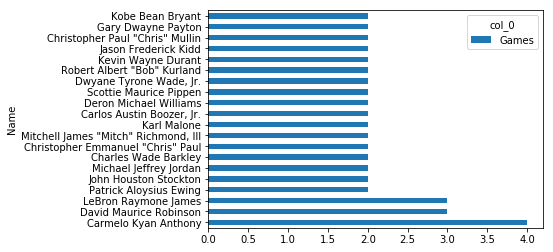

In [87]:
best.columns
ax = best.plot.barh()

# Scatter Plots

With the same aggregated data, you can also generate a scatter plot that shows the relationship that exists between the number of connections and the number of interactions in the data set. Try doing this for the gymnastics data set.

What other ways can you think of to visualize these data sets? Let your creativity run wild and show us what you've got!


# Deeper Analysis of Networks
# Subgraphs


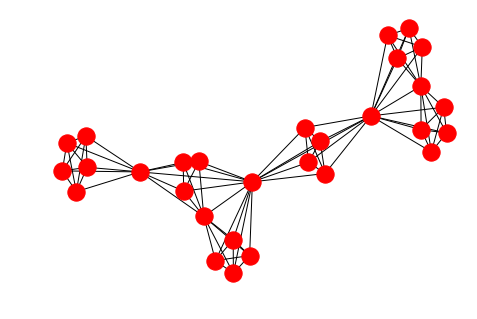

In [94]:
ego = nx.ego_graph(G, 'Linda Joan Metheny (-Mulvihill)', radius=25)
nx.draw(ego)

# Community Detection

In [99]:
import community
parts = community.best_partition(G)
parts

{'Ladislava Aloisie "Laddie" Bakanic (Hniz-)': 0,
 'Marian Emma Barone (Twining-)': 0,
 'Consetta Anne "Connie" Caruccio-Lenz': 1,
 'Dorothy Katherine Dalton': 0,
 'Meta Elste (Neumann-)': 0,
 'Helen Mary Schifano (-Sjursen)': 0,
 'Clara Marie Schroth-Lomady': 0,
 'Anita Aline Simonis (-Zetts)': 0,
 'Ruth Catherine Grulkowski (-Hatyina)': 0,
 'Marie Margaret Hoesly': 0,
 'Doris Ann Kirkman (-Cannon)': 0,
 'Ruth Elizabeth Topalian (Lehle-)': 0,
 'Mohini Bhardwaj (-Barry)': 2,
 'Annia Portuondo Hatch': 2,
 'Terin Marie Humphrey': 2,
 'Courtney Anne Kupets (-Carter)': 2,
 'Courtney Lynn McCool': 2,
 'Carly Rae Patterson (-Caldwell)': 2,
 'Pamela Jean "Pam" Bileck (-Flat)': 3,
 'Michelle Hollis Dusserre (-Farrell)': 3,
 'Kathleen Ann "Kathy" Johnson (-Clarke)': 3,
 'Julianne Lyn McNamara (-Zeile)': 3,
 'Mary Lou Retton (-Kelley)': 3,
 'Tracee Ann Talavera (-Kent)': 3,
 'Simone Arianne Biles': 4,
 'Gabrielle Christina Victoria "Gabby" Douglas': 4,
 'Alexandra Rose "Aly" Raisman': 4,
 'Laure

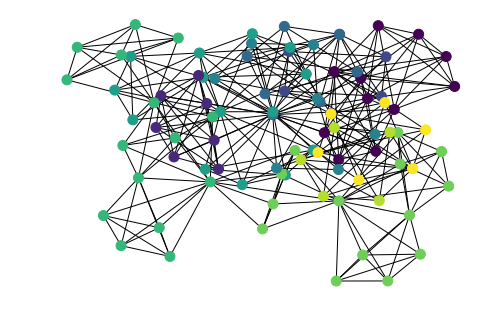

In [102]:
values = list(parts.values())
nx.draw_kamada_kawai(G, node_size=100, node_color=values)

# Hierarchical Graphs

We can continue going up the hierarchy if we wanted to, strip out the athletes as entities, and analyze the data at the Games level. To do this, we would need to designate the Games field as the entities and then use the athlete names as the edge criteria so that there would be an edge between two Olympic games if an athlete played in both of them.

You already have the tools in your toolbox to be able to do this, so give it a try using the basketball data set. Create a graph with Games as the entities and then produce a visualization showing the network.

    Are there any years connected that you weren't expecting?
    Are there any years you were expecting to be connected that are not?
    Dig into the underlying data and see if you can find out which players are driving the connection between years.



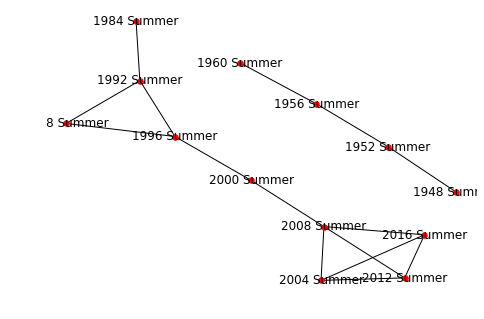

In [109]:
#G = nx.from_pandas_edgelist(men,source='Games', target='Name')
#nx.draw(G)

basket = df_to_graph(men, entity='Games', edge='Name')
basket.head()

B3 = nx.from_pandas_edgelist(basketball3, 
                            source='Games_x', 
                            target='Games_y', 
                            edge_attr='Name')
nx.draw_kamada_kawai(B3, node_size=30, with_labels=True)

#Alberto's copyright

# Bonus: More Complex Networks

Now that we have analyzed networks at multiple hierarchical levels individually, we can try to include nodes at different levels of the hierarchy within the same graph. For example, you can create a graph that matches basketball players to the Olympic games they participated in and then combine that graph with the player graph you created previously to form a new graph that has both games, players, and all the relationships between them captured.

To do this, you would select the Games and Name field from the original basketball data set and create a graph (H) using the from_pandas_edgelist method. You would then combine this new graph with your player graph (G) using the nx.compose method into a new graph (F) as follows.

F = nx.compose(G,H)

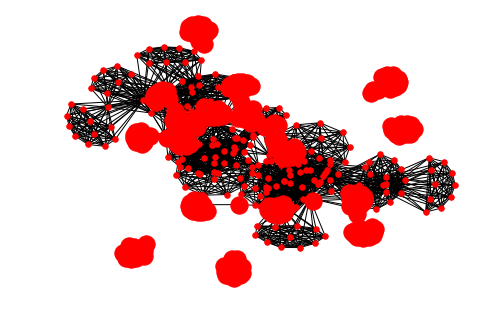

In [153]:
H = nx.from_pandas_edgelist(men,source='Games', target='Name')
nx.draw(H)      


F= nx.compose(G2,H)
nx.draw_kamada_kawai(F, node_size=30)
